In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=2)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8064 - loss: 0.5095 - val_accuracy: 0.8134 - val_loss: 0.4883
Epoch 2/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8039 - loss: 0.4938 - val_accuracy: 0.8134 - val_loss: 0.4965
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.8035 - loss: 0.5108
CNN Validation Accuracy: 81.34%
Models built for CNN, RNN, and GANs


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.8113 - loss: 0.5150 - val_accuracy: 0.8134 - val_loss: 0.4903
Epoch 2/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8111 - loss: 0.4887 - val_accuracy: 0.8134 - val_loss: 0.4946
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8077 - loss: 0.5024
CNN Validation Accuracy: 81.34%


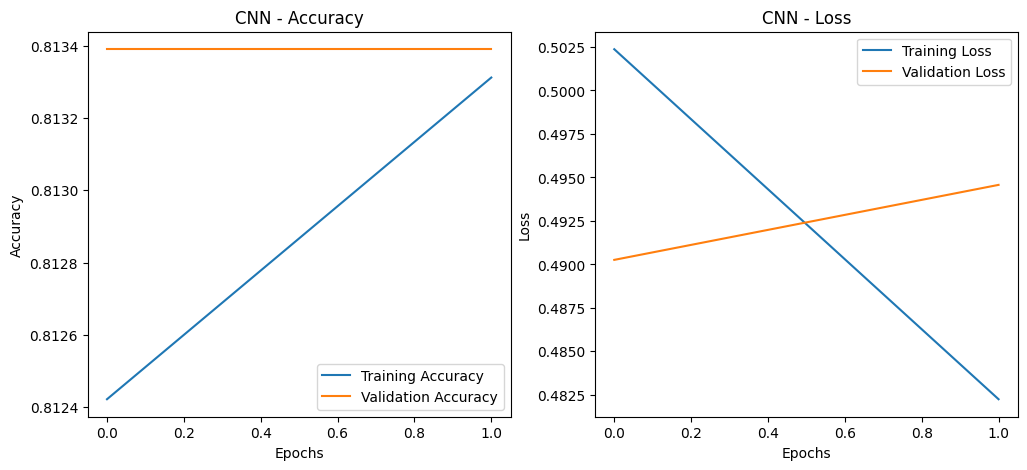

Displaying Actual vs Predicted Images
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


KeyError: 1

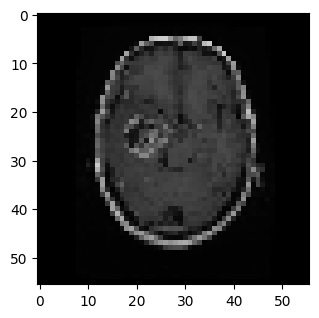

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential([
        layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(train_data.class_indices), activation='softmax')
    ])

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=2)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# ----------------------------- Visualizations -----------------------------
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'{title} - Accuracy')

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'{title} - Loss')
    plt.show()

# Plot CNN Results
plot_history(cnn_history, 'CNN')

# ----------------------------- Display Predictions -----------------------------
def display_predictions(model, data):
    images, labels = next(data)
    predictions = model.predict(images)

    plt.figure(figsize=(12, 12))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        actual_label = np.argmax(labels[i])
        predicted_label = np.argmax(predictions[i])
        plt.title(f"Actual: {data.class_indices[actual_label]}\nPredicted: {data.class_indices[predicted_label]}")
        plt.axis('off')
    plt.show()

print("Displaying Actual vs Predicted Images")
display_predictions(cnn_model, val_data)

# You can follow a similar structure to add visualizations for RNN and GANs if needed.


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.7904 - loss: 0.5254 - val_accuracy: 0.8134 - val_loss: 0.4877
Epoch 2/2
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8115 - loss: 0.4868 - val_accuracy: 0.8134 - val_loss: 0.4873
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.8237 - loss: 0.4742
CNN Validation Accuracy: 81.34%


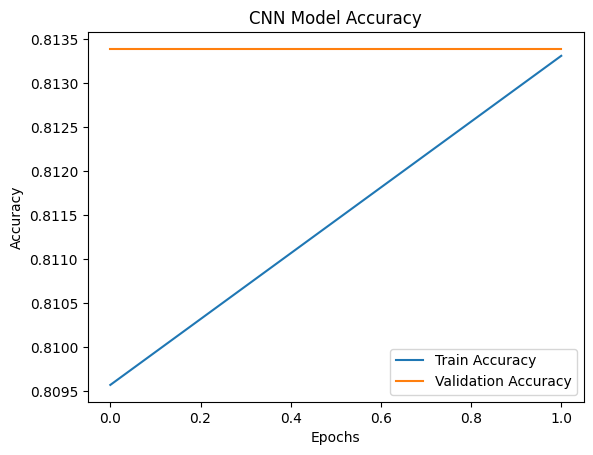

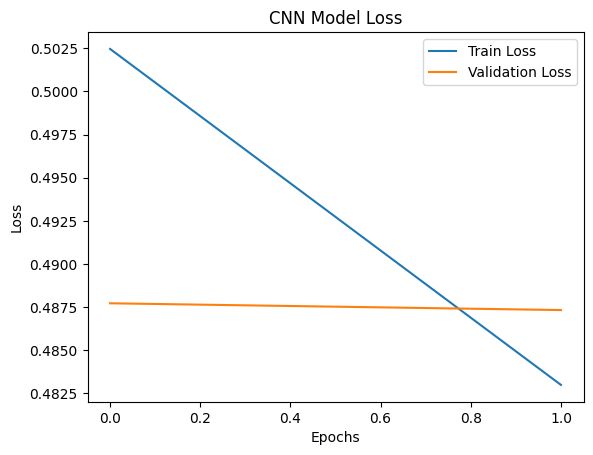

Models built for CNN, RNN, and GANs


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=2)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.7946 - loss: 0.5331 - val_accuracy: 0.8134 - val_loss: 0.4862
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8084 - loss: 0.4918 - val_accuracy: 0.8134 - val_loss: 0.4871
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8158 - loss: 0.4754 - val_accuracy: 0.8134 - val_loss: 0.4865
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.8021 - loss: 0.4890 - val_accuracy: 0.8134 - val_loss: 0.4911
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8118 - loss: 0.4685 - val_accuracy: 0.8134 - val_loss: 0.4887
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.8193 - loss: 0.4535 - val_accuracy: 0.8134 - val_loss: 0.5046
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8117 - loss: 0.4683 - val_accuracy: 0.8134 - val_loss: 0.4931
Epoch 

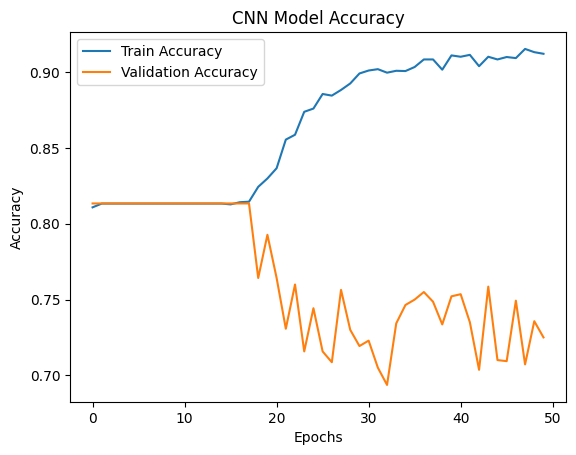

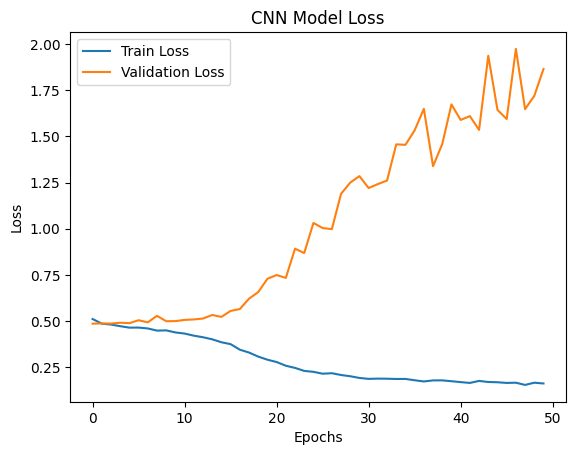

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


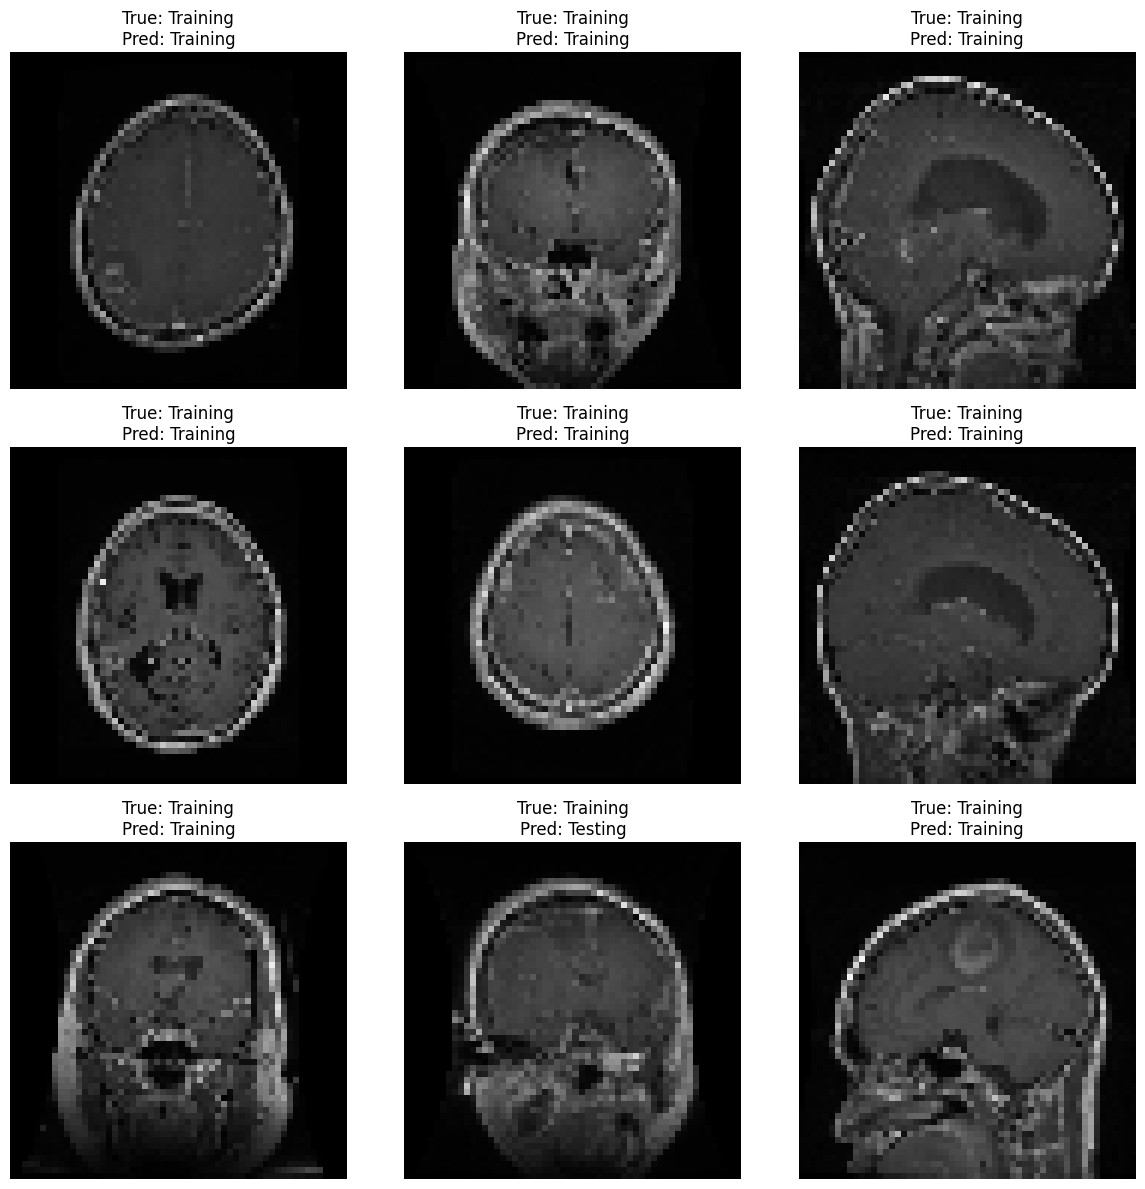

Models built for CNN, RNN, and GANs


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=50)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display actual vs predicted images for CNN
import random

x_val, y_val = next(val_data)
predictions = cnn_model.predict(x_val)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    true_label = np.argmax(y_val[i])
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {list(train_data.class_indices.keys())[true_label]}\nPred: {list(train_data.class_indices.keys())[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 88ms/step - accuracy: 0.8015 - loss: 0.5173 - val_accuracy: 0.8134 - val_loss: 0.4976
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8084 - loss: 0.4879 - val_accuracy: 0.8134 - val_loss: 0.4865
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8163 - loss: 0.4747 - val_accuracy: 0.8134 - val_loss: 0.4857
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 72ms/step - accuracy: 0.8162 - loss: 0.4673 - val_accuracy: 0.8134 - val_loss: 0.4923
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.8122 - loss: 0.4646 - val_accuracy: 0.8134 - val_loss: 0.4975
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.8085 - loss: 0.4692 - val_accuracy: 0.8134 - val_loss: 0.5212
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.8106 - loss: 0.4662 - val_accuracy: 0.8134 - val_loss: 0.4964
Epoch 

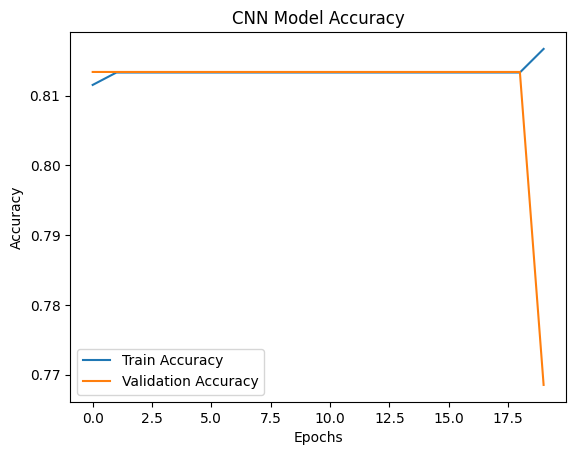

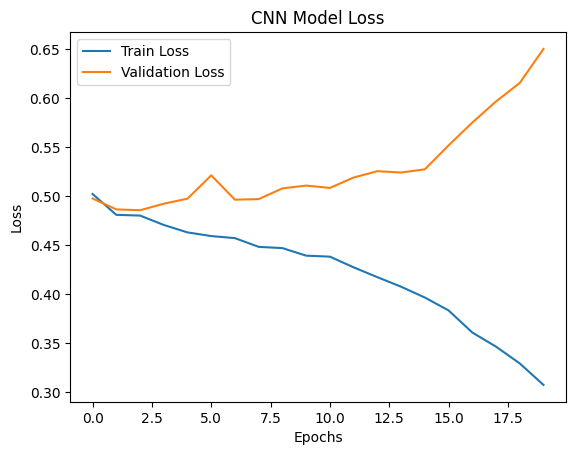

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


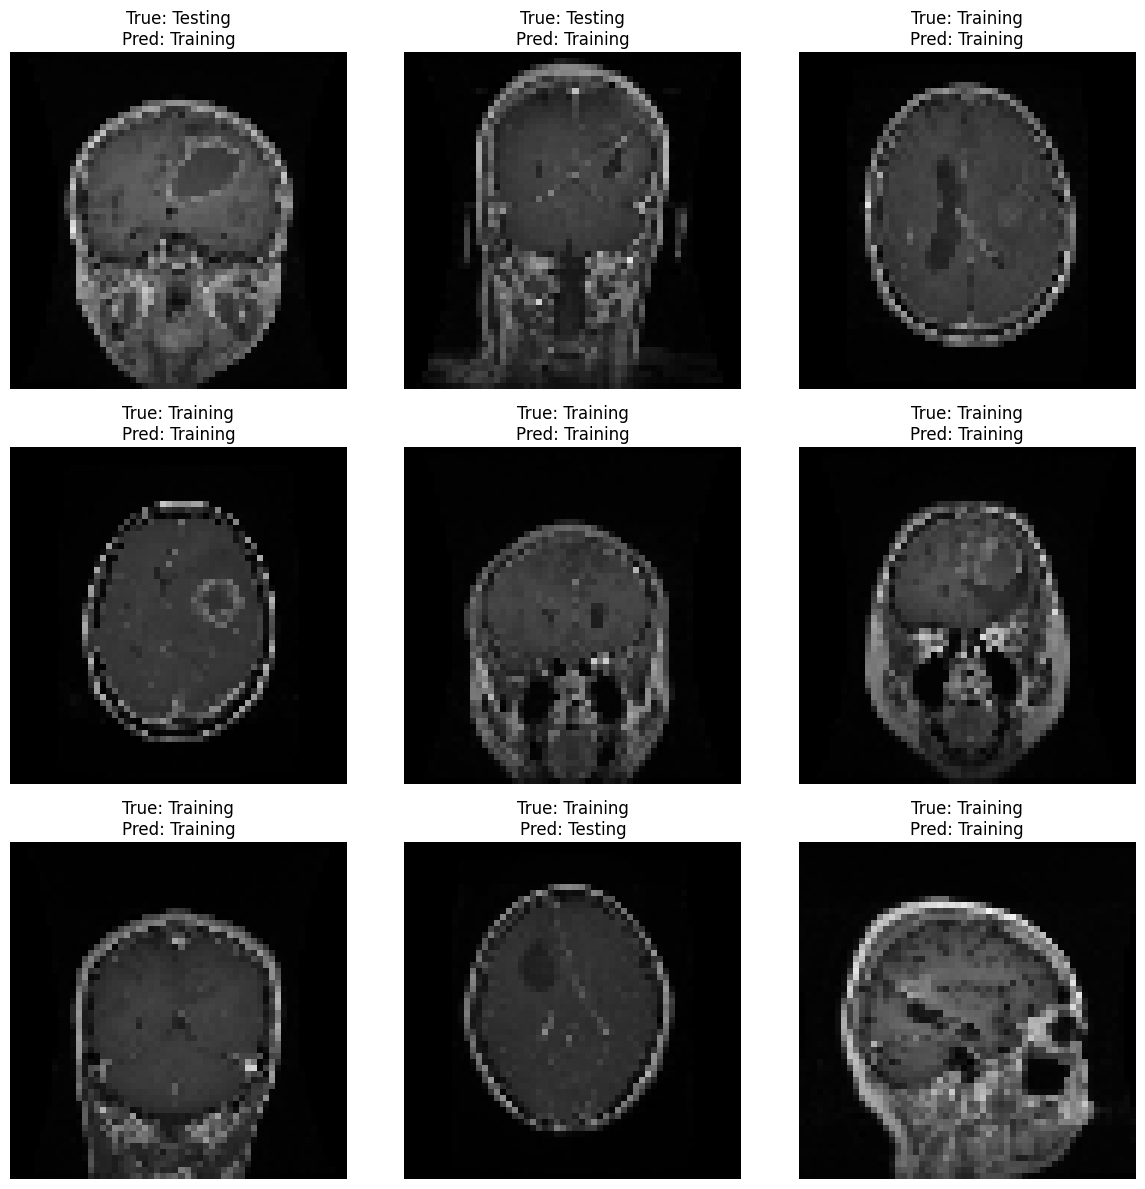

Models built for CNN, RNN, and GANs


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=20)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display actual vs predicted images for CNN
import random

x_val, y_val = next(val_data)
predictions = cnn_model.predict(x_val)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    true_label = np.argmax(y_val[i])
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {list(train_data.class_indices.keys())[true_label]}\nPred: {list(train_data.class_indices.keys())[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")


Found 5619 images belonging to 2 classes.
Found 1404 images belonging to 2 classes.
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.8058 - loss: 0.5274 - val_accuracy: 0.8134 - val_loss: 0.4875
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8169 - loss: 0.4841 - val_accuracy: 0.8134 - val_loss: 0.4943
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8112 - loss: 0.4817 - val_accuracy: 0.8134 - val_loss: 0.4927
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.8161 - loss: 0.4636 - val_accuracy: 0.8134 - val_loss: 0.4907
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 71ms/step - accuracy: 0.8070 - loss: 0.4737 - val_accuracy: 0.8134 - val_loss: 0.4970
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8099 - loss: 0.4618 - val_accuracy: 0.8134 - val_loss: 0.4927
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 74ms/step - accuracy: 0.8109 - loss: 0.4573 - val_accuracy: 0.8134 - val_loss: 0.5108
Epoch 

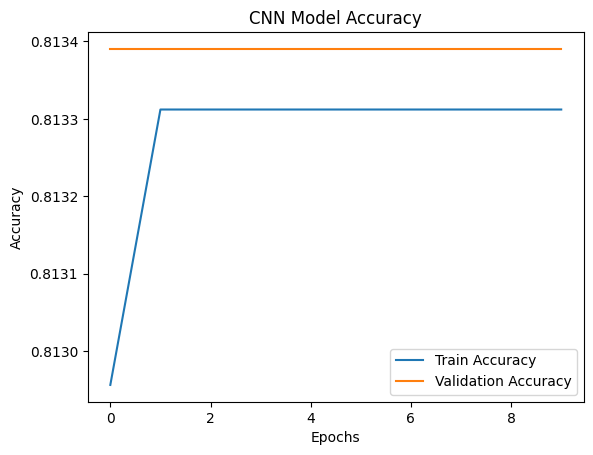

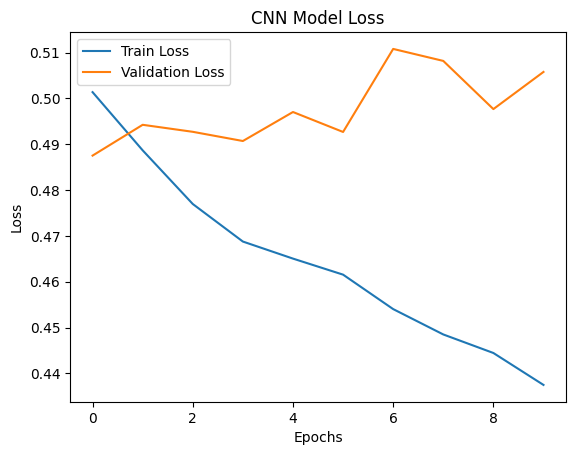

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


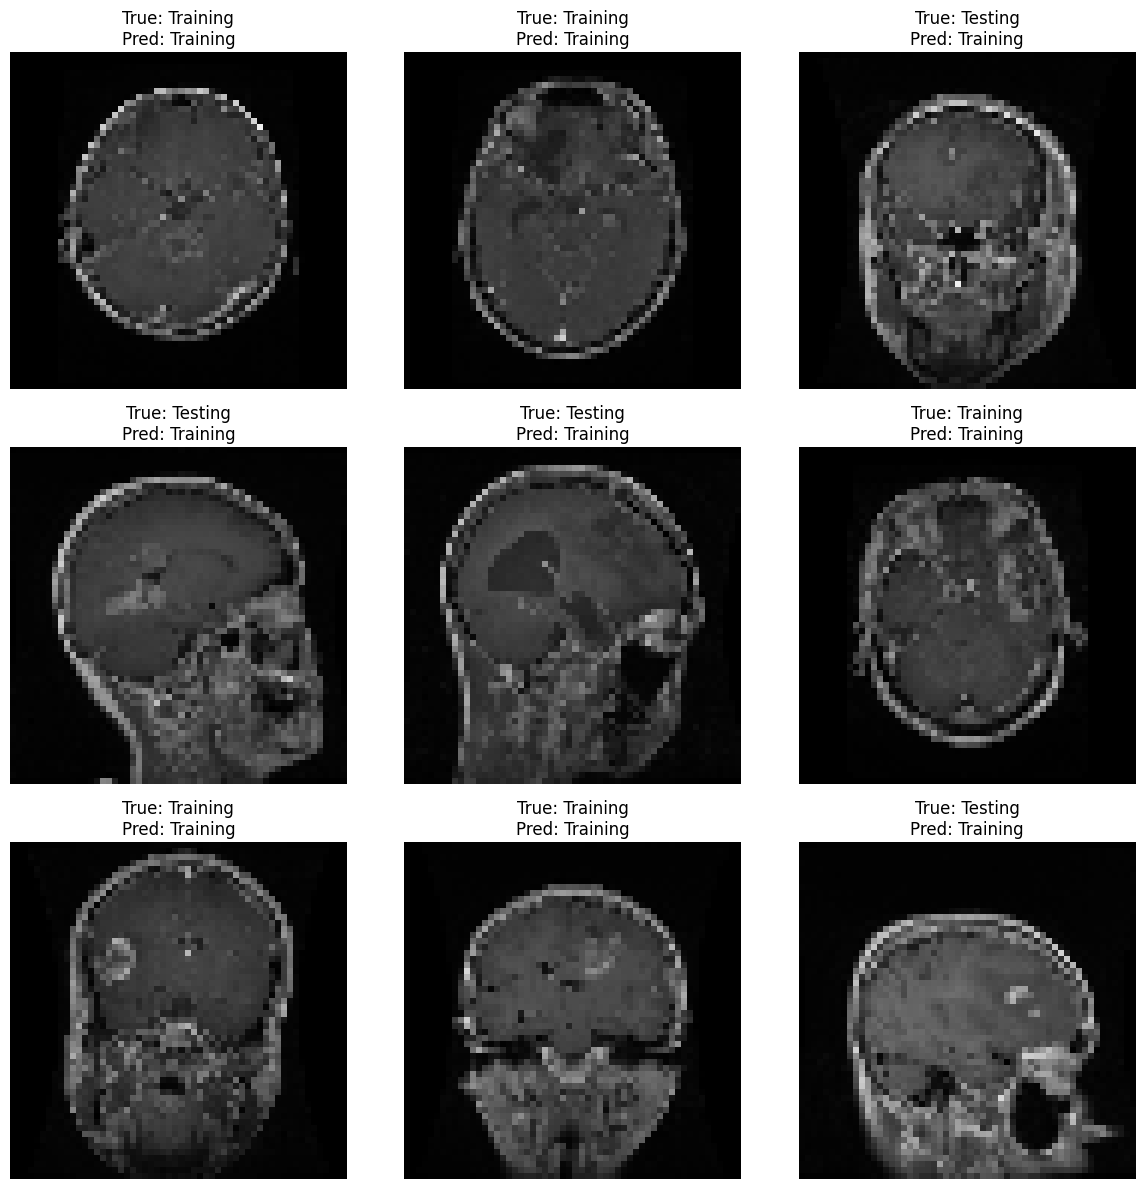

Models built for CNN, RNN, and GANs


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# Set dataset path
dataset_path = '/kaggle/input/brain-tumor-mri-dataset'

# Preprocess images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path, 
    target_size=(56, 56), 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

# ----------------------------- CNN Model -----------------------------
def build_cnn_model():
    return Sequential(
        [
            layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(56, 56, 3)),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(32, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Conv2D(64, (3,3), activation='relu', padding='same'),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )

cnn_model = build_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_history = cnn_model.fit(train_data, validation_data=val_data, epochs=10)

# Evaluate CNN Model
loss, accuracy = cnn_model.evaluate(val_data)
print(f"CNN Validation Accuracy: {accuracy * 100:.2f}%")

# Visualize results for CNN
plt.figure()
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Display actual vs predicted images for CNN
import random

x_val, y_val = next(val_data)
predictions = cnn_model.predict(x_val)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_val[i])
    true_label = np.argmax(y_val[i])
    pred_label = np.argmax(predictions[i])
    plt.title(f"True: {list(train_data.class_indices.keys())[true_label]}\nPred: {list(train_data.class_indices.keys())[pred_label]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# ----------------------------- RNN Model -----------------------------
def build_rnn_model():
    return Sequential(
        [
            layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu', padding='same'), input_shape=(10, 56, 56, 3)),
            layers.TimeDistributed(layers.MaxPooling2D((2,2))),
            layers.TimeDistributed(layers.Flatten()),
            layers.LSTM(64, return_sequences=True),
            layers.LSTM(64),
            layers.Dense(64, activation='relu'),
            layers.Dense(len(train_data.class_indices), activation='softmax')
        ]
    )
rnn_model = build_rnn_model()
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------- GAN Model -----------------------------
def build_generator():
    return Sequential(
        [
            layers.Dense(128, activation='relu', input_dim=100),
            layers.Dense(7 * 7 * 256),
            layers.BatchNormalization(),
            layers.Reshape((7, 7, 256)),
            layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same', activation='relu'),
            layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='sigmoid')
        ]
    )

def build_discriminator():
    return Sequential(
        [
            layers.Conv2D(64, (3,3), padding='same', input_shape=(56, 56, 3)),
            layers.LeakyReLU(alpha=0.2),
            layers.MaxPooling2D((2,2)),
            layers.Flatten(),
            layers.Dense(1, activation='sigmoid')
        ]
    )

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

z = layers.Input(shape=(100,))
generated_image = generator(z)
discriminator.trainable = False
validity = discriminator(generated_image)
gan_model = models.Model(z, validity)
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

print("Models built for CNN, RNN, and GANs")
